# Part I - (Dataset Exploration of Prosper Loan Data)
## by Pranav Naresh Medhi

## Introduction
> Prosper Loan Data is a dataset that contains information about 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and various other variables, this is one of the most varied dataset I found which contains information on topics that are closely related as well as not so much, it can be used for studying tons of trends in the loan business, which is one of the reasons why I picked this dataset.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# Loading the dataset
df=pd.read_csv('prosperLoanData.csv')

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
# I will be including only the following columns for the exploration process, as it seems like they might or might not have an
#effect on the Loan approval of any given individual

cols_to_include=['Term','LoanStatus','EstimatedEffectiveYield','BorrowerAPR','BorrowerRate',
                'ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','DelinquenciesLast7Years'
                ,'ListingCategory (numeric)','EmploymentStatus','Occupation','EmploymentStatusDuration'
                ,'IsBorrowerHomeowner','StatedMonthlyIncome','IncomeVerifiable','Recommendations'
                ,'DebtToIncomeRatio','LoanOriginalAmount','PercentFunded','IncomeRange','BorrowerState'
                ,'Investors','CreditScoreRangeUpper','MonthlyLoanPayment']

In [8]:
# Defining a new dataset with only the columns of interest
new_df=df[cols_to_include]

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
EstimatedEffectiveYield      84853 non-null float64
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
DelinquenciesLast7Years      112947 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
IncomeVerifiable             113937 non-null bool
Recommendations              113937 non-null int64
DebtToIn

In [10]:
# We have some missing values in the columns we selected, I will be dropping any null valued columns
new_df=new_df.dropna()

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 25 columns):
Term                         76216 non-null int64
LoanStatus                   76216 non-null object
EstimatedEffectiveYield      76216 non-null float64
BorrowerAPR                  76216 non-null float64
BorrowerRate                 76216 non-null float64
ProsperRating (numeric)      76216 non-null float64
ProsperRating (Alpha)        76216 non-null object
ProsperScore                 76216 non-null float64
DelinquenciesLast7Years      76216 non-null float64
ListingCategory (numeric)    76216 non-null int64
EmploymentStatus             76216 non-null object
Occupation                   76216 non-null object
EmploymentStatusDuration     76216 non-null float64
IsBorrowerHomeowner          76216 non-null bool
StatedMonthlyIncome          76216 non-null float64
IncomeVerifiable             76216 non-null bool
Recommendations              76216 non-null int64
DebtToIncomeRatio     

In [12]:
new_df.head(1)

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,DelinquenciesLast7Years,ListingCategory (numeric),...,IncomeVerifiable,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,BorrowerState,Investors,CreditScoreRangeUpper,MonthlyLoanPayment
1,36,Current,0.0796,0.12016,0.092,6.0,A,7.0,0.0,2,...,True,0,0.18,10000,1.0,"$50,000-74,999",CO,1,699.0,318.93


In [13]:
# We should make Term categorical instead of keeping it int type as there are only limited number of possibilities
new_df.Term.value_counts()

36    51919
60    22883
12     1414
Name: Term, dtype: int64

In [14]:
new_df['Term'] = new_df['Term'].astype('category')

In [15]:
#Cleaning some of the column names
new_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_alpha',
                        'ProsperRating (numeric)': 'ProsperRating_numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_numeric',
                      'EstimatedEffectiveYield':'Yield',
                      'LoanOriginalAmount':'LoanAmount'}, 
               inplace=True)

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 25 columns):
Term                        76216 non-null category
LoanStatus                  76216 non-null object
Yield                       76216 non-null float64
BorrowerAPR                 76216 non-null float64
BorrowerRate                76216 non-null float64
ProsperRating_numeric       76216 non-null float64
ProsperRating_alpha         76216 non-null object
ProsperScore                76216 non-null float64
DelinquenciesLast7Years     76216 non-null float64
ListingCategory_numeric     76216 non-null int64
EmploymentStatus            76216 non-null object
Occupation                  76216 non-null object
EmploymentStatusDuration    76216 non-null float64
IsBorrowerHomeowner         76216 non-null bool
StatedMonthlyIncome         76216 non-null float64
IncomeVerifiable            76216 non-null bool
Recommendations             76216 non-null int64
DebtToIncomeRatio           76216 no

In [17]:
new_df.head(1)

,Term,LoanStatus,Yield,BorrowerAPR,BorrowerRate,ProsperRating_numeric,ProsperRating_alpha,ProsperScore,DelinquenciesLast7Years,ListingCategory_numeric,...,IncomeVerifiable,Recommendations,DebtToIncomeRatio,LoanAmount,PercentFunded,IncomeRange,BorrowerState,Investors,CreditScoreRangeUpper,MonthlyLoanPayment
1,36,Current,0.0796,0.12016,0.092,6.0,A,7.0,0.0,2,...,True,0,0.18,10000,1.0,"$50,000-74,999",CO,1,699.0,318.93


In [18]:
new_df.IncomeRange.value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

In [19]:
new_df.DelinquenciesLast7Years.value_counts()

0.0     53582
1.0      2512
3.0      2003
2.0      1819
4.0      1598
5.0      1135
6.0      1106
7.0      1015
8.0       835
9.0       725
10.0      712
11.0      652
12.0      579
13.0      545
15.0      518
14.0      515
16.0      467
17.0      377
18.0      359
20.0      351
19.0      342
21.0      306
23.0      289
22.0      264
24.0      263
25.0      235
26.0      220
27.0      201
28.0      188
29.0      170
        ...  
69.0       14
67.0       12
75.0       12
71.0       11
73.0        9
70.0        9
77.0        9
72.0        7
78.0        6
90.0        6
88.0        5
92.0        5
82.0        5
86.0        4
80.0        4
89.0        3
76.0        3
74.0        3
95.0        3
81.0        3
83.0        3
87.0        2
91.0        2
79.0        2
84.0        2
94.0        2
93.0        1
96.0        1
98.0        1
97.0        1
Name: DelinquenciesLast7Years, Length: 99, dtype: int64

In [20]:
new_df.LoanStatus.value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [21]:
new_df.ProsperRating_alpha.value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_alpha, dtype: int64

In [22]:
df.CreditScoreRangeUpper.value_counts()

699.0    16492
679.0    16366
719.0    15471
739.0    12923
659.0    12199
759.0     9267
779.0     6606
799.0     4624
639.0     4172
619.0     3602
819.0     2644
539.0     1593
559.0     1474
839.0     1409
579.0     1357
599.0     1125
859.0      567
519.0      554
499.0      346
879.0      212
479.0      141
19.0       133
459.0       36
899.0       27
439.0        5
379.0        1
Name: CreditScoreRangeUpper, dtype: int64

In [23]:
new_df.IsBorrowerHomeowner.value_counts()

True     41454
False    34762
Name: IsBorrowerHomeowner, dtype: int64

I have cleaned the above dataset such that there are no null values in the dataset, some of the datatypes have been altered, and I also renamed some of the columns to easier names.

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I will be taking into consideration only about 15-20 variables as it is not required to look at the all the variables available for the purpose of this project. This is one of the most varied dataset I found which contains information on topics that are closely related as well as not so much, which was one of the reasons for picking this dataset as it gave me the freedom of choosing the variables I was more interested in.

### What is/are the main feature(s) of interest in your dataset?

> I would be focusing on the parameters that decide the approval of the loan , by identifying the relations between some of the column attributes in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the features in the dataset that could support my investigation would be Employmentstatus , Income, Isborrowerhomeowner, Prosper rating of the individual,DelinquenciesLast7Years, CreditScoreRangeUpper as it gives us more idea about the individuals assets.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Question
How does the ProsperRating_alpha variable look like visually?

### Visualisation

In [24]:
new_df['ProsperRating_alpha'].value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_alpha, dtype: int64

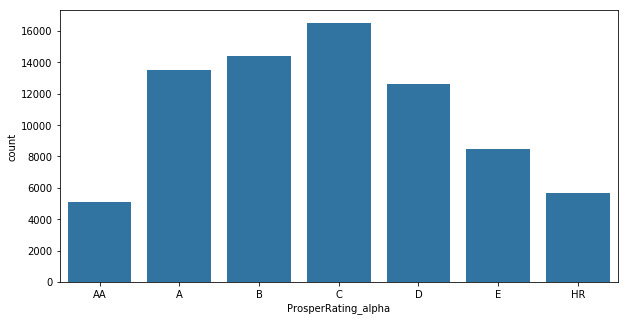

In [25]:
plt.figure(figsize = [10, 5]) 
#ProsperRating Alpha is an Ordinal variable so we will be having to take care of the order, same for IncomeRange
ProsperRating_Alpha_portions = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_portions = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
#compatibility setting
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): 
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_portions)
    new_df['ProsperRating_alpha'] = new_df['ProsperRating_alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_portions)
    new_df['IncomeRange'] = new_df['IncomeRange'].astype(vclasses_1)
else: 
    new_df['ProsperRating_alpha'] = new_df['ProsperRating_alpha'].astype('category', ordered = True, categories = ProsperRating_Alpha_portions)
    new_df['IncomeRange'] = new_df['IncomeRange'].astype('category', ordered = True, categories = IncomeRange_portions)

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = new_df, x = 'ProsperRating_alpha', color = base_color);

### Observation
We can see that Type C of the ProsperRating is the most common among the Applicants for loans while the AA Type having the least of the counts.

### Question
Lets look at Loan Status of the borrowers

### Visualisation

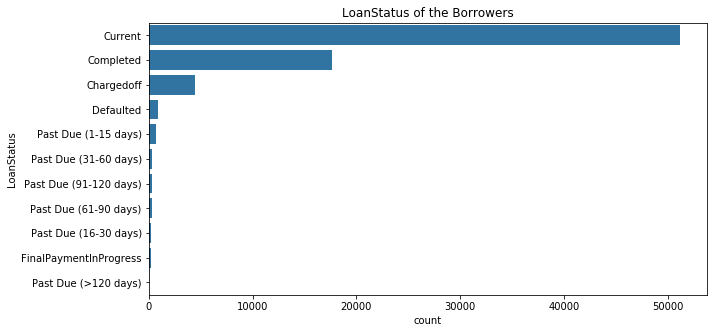

In [26]:
# LoanStatus variable
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of the Borrowers")
sb.countplot(data = new_df, y = 'LoanStatus', color = base_color,
             order = new_df['LoanStatus'].value_counts().index);

### Observation
A huge majority of the Borrowers are in the Current Bracket for Loanstatus. Looks like Completed and Chargedoff are the next in line , while Nearly no borrowers in the Past Due(>120 days) bracket.

### Question

Lets have a look at the Top 5 most popular states from which borrowers are located in 

### Visualisation

In [27]:
new_df['BorrowerState'].value_counts()

CA    9574
NY    5184
TX    5086
FL    4738
IL    3871
OH    3061
GA    3006
VA    2530
NJ    2463
PA    2416
MI    2349
NC    2194
MD    2066
WA    1925
MA    1696
MO    1590
MN    1554
CO    1539
IN    1518
TN    1396
CT    1371
WI    1359
AZ    1237
AL    1085
OR    1045
NV     916
SC     872
KY     804
KS     775
LA     768
AR     689
OK     665
MS     600
NE     496
UT     441
NH     410
RI     376
ID     348
DC     310
HI     307
NM     293
WV     274
DE     253
MT     192
SD     165
VT     151
AK     150
WY     108
Name: BorrowerState, dtype: int64

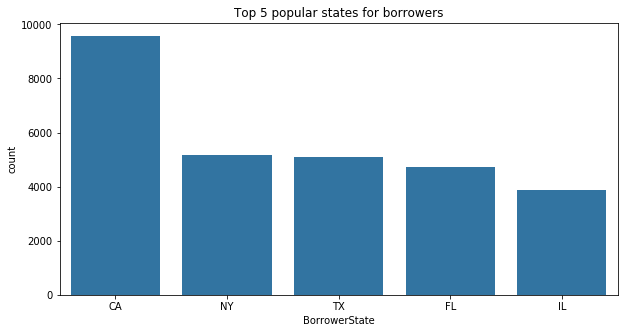

In [28]:
#BorrowerState variable
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = new_df, x = 'BorrowerState', color = base_color,
             order = new_df['BorrowerState'].value_counts().head(5).index );
plt.title("Top 5 popular states for borrowers");

### Observation
The Top 5 popular states we have borrowers from are CA, NY, TX, FL, IL. With CA being the at the top with almost double the counts of the borrowers in any of the follower states.

### Question
Lets look at what the most popular occupations are for the borrowers

### Visualisation

In [29]:
new_df.Occupation.value_counts()

Other                                 18501
Professional                           9916
Executive                              3206
Computer Programmer                    3038
Teacher                                2777
Analyst                                2683
Administrative Assistant               2603
Accountant/CPA                         2413
Nurse (RN)                             2121
Clerical                               2059
Skilled Labor                          2033
Sales - Commission                     1982
Retail Management                      1900
Sales - Retail                         1724
Police Officer/Correction Officer      1273
Truck Driver                           1218
Laborer                                1162
Civil Service                          1131
Engineer - Mechanical                  1098
Construction                           1052
Food Service Management                 935
Engineer - Electrical                   873
Medical Technician              

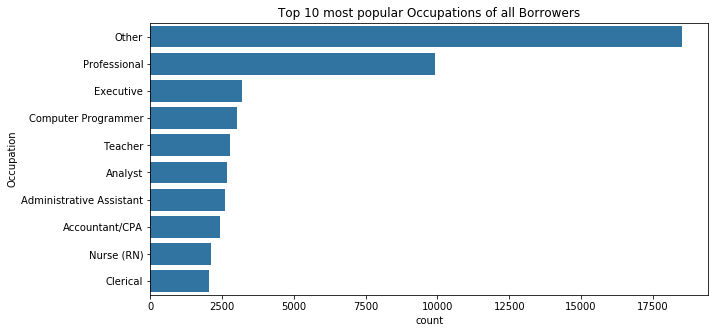

In [30]:

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = new_df, y = 'Occupation', color = base_color,
             order = new_df['Occupation'].value_counts().head(10).index );
plt.title("Top 10 most popular Occupations of all Borrowers");

### Observation
Most common occupations among the borrowers were Other, Professional, Executive, Computer Programmer, Teacher.

### Question
What does the Income Range and EmploymentStatus Variable tell us

### Visualisation

In [31]:
#It doesnt make sense to consider Unemployed status individual in the Income Range , as they dont have any income
new_df.EmploymentStatus.value_counts()

Employed         65883
Full-time         7577
Other             2194
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

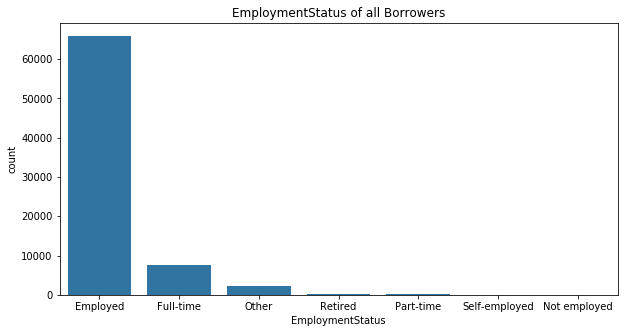

In [32]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = new_df, x = 'EmploymentStatus', color = base_color,
             order = new_df['EmploymentStatus'].value_counts().index);

In [33]:
new_df.IncomeRange.value_counts()


$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Name: IncomeRange, dtype: int64

In [34]:
#So dropping the Not Employed personnel
newer_df = new_df[new_df['IncomeRange'] != 'Not employed']

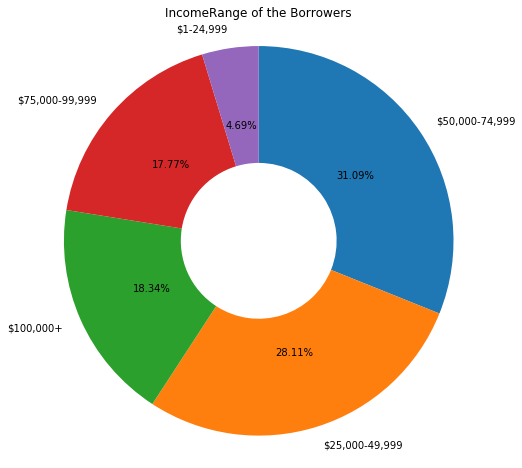

In [35]:
#IncomeRange Variable
plt.figure(figsize = [15, 8])
sorted_counts = newer_df['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.6}, autopct   = '%.2f%%');
plt.title("IncomeRange of the Borrowers")
plt.axis('square');

### Observation
Overall majority of the population of the dataset are employed, and the retired , not employed, self employed, part-time type of employments section were negligible compared to it.

Most common income range was 50k-75k closely followed by 25k-50k range. It was rather amusing to look at the highest amount range which was 100k+ not adding to the lowest percentage of the borrowers, I think an income range of even higher paid individual would have made it such that it be the lowest percent of the population.

### Question

Lets have a look at the ListingCategory_numeric Variable

### Visualisation

In [36]:
new_df.ListingCategory_numeric.value_counts()

1     48604
7      8280
2      6328
3      3644
6      2032
13     1767
15     1382
14      795
18      783
20      729
19      712
16      289
11      201
5       201
8       191
9        83
10       82
17       49
12       45
0        19
Name: ListingCategory_numeric, dtype: int64

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

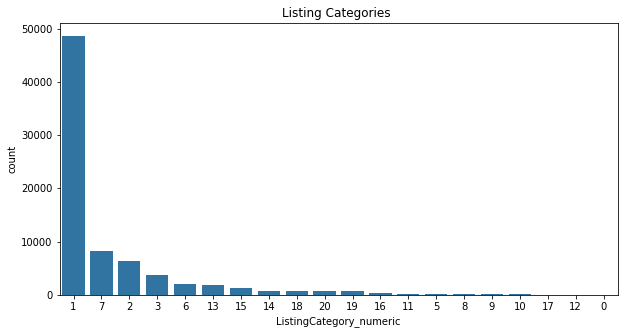

In [37]:
# ListingCategory_Numeric
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("Listing Categories ")
sb.countplot(data = new_df, x = 'ListingCategory_numeric', color = base_color,
             order = new_df['ListingCategory_numeric'].value_counts().index );

### Observations

We can observe that the most popular listing category for which loan borrowers were present were categories 1, 7 and 2 which signify Debt Consolidation, Other and Home Improvement categories. 

Now looking at numeric Variables

### Question

How does the DelinquenciesLast7Years variable look upon visualising.

### Visualisation

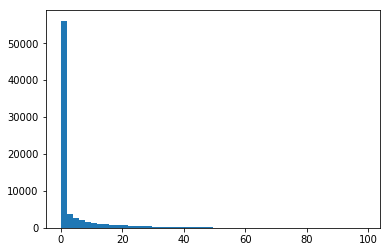

In [38]:
plt.hist(data=new_df, x='DelinquenciesLast7Years', bins=50, color=base_color);

### Observations
Most of the borrowers have No Deinquencies in the past 7 years.

### Question

Lets have a look at the BorrowerRate variable and how it changes.

### Visualisation

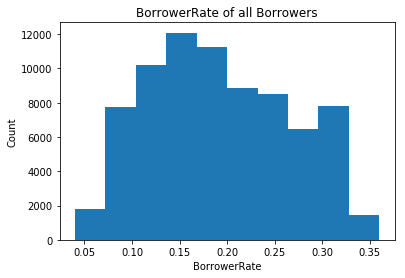

In [39]:
plt.hist(data = new_df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate of all Borrowers");

### Observations
BorrowRate is pretty mixed, with maximum number of borrowers having the borrowerRate of 0.15 or 15 percent. Interesting , very low count of people have the maximum of 35% or minimum of 5% borrowerRate.  

### Question

How does the variable EmploymentStatusDuration look like visually

### Visualisation

In [40]:
# new_df.EmploymentStatusDuration.value_counts()

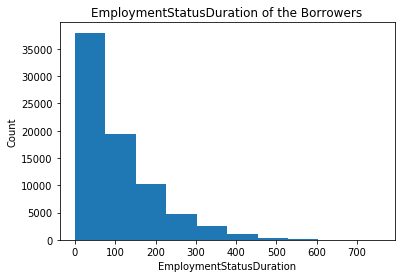

In [41]:
plt.hist(data = new_df, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("EmploymentStatusDuration of the Borrowers");

### Observations
We can observe that most of the employees have been in their status for a range of 0-100 months.

### Question
 
Lets have a look at the variable StatedMonthlyIncome

### Visualisation

In [42]:
new_df.columns

Index(['Term', 'LoanStatus', 'Yield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_numeric', 'ProsperRating_alpha', 'ProsperScore',
       'DelinquenciesLast7Years', 'ListingCategory_numeric',
       'EmploymentStatus', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'IncomeVerifiable',
       'Recommendations', 'DebtToIncomeRatio', 'LoanAmount', 'PercentFunded',
       'IncomeRange', 'BorrowerState', 'Investors', 'CreditScoreRangeUpper',
       'MonthlyLoanPayment'],
      dtype='object')

In [43]:
new_df.StatedMonthlyIncome.value_counts()

4166.666667     2400
5000.000000     2265
3333.333333     1885
5833.333333     1812
5416.666667     1749
6250.000000     1638
4583.333333     1601
6666.666667     1599
3750.000000     1587
8333.333333     1197
2500.000000     1188
2916.666667     1168
7083.333333     1121
4333.333333     1117
7500.000000     1117
10000.000000     964
3500.000000      952
4000.000000      832
6000.000000      796
9166.666667      784
3000.000000      697
2666.666667      666
3166.666667      637
4500.000000      627
7916.666667      623
5166.666667      615
2083.333333      605
4666.666667      596
4833.333333      561
12500.000000     530
                ... 
5060.916667        1
7135.416667        1
3288.750000        1
6763.500000        1
4713.750000        1
6108.166667        1
2712.916667        1
6761.000000        1
8566.666667        1
3735.833333        1
4713.250000        1
5058.083333        1
11475.000000       1
5085.166667        1
6396.333333        1
4453.000000        1
19491.666667 

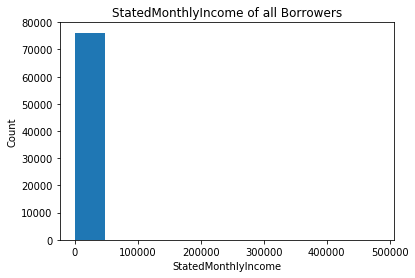

In [44]:
#looks like the income for nearly all the borrowers was less than 100k$, we need to change the scope of our visualisation
plt.hist(data = new_df, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

In [45]:
new_df['StatedMonthlyIncome'].describe()

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [46]:
np.log10(new_df['StatedMonthlyIncome'].describe())

count    4.882046
mean     3.778356
std      3.708484
min     -0.602060
25%      3.554287
50%      3.702574
75%      3.860338
max      5.684247
Name: StatedMonthlyIncome, dtype: float64

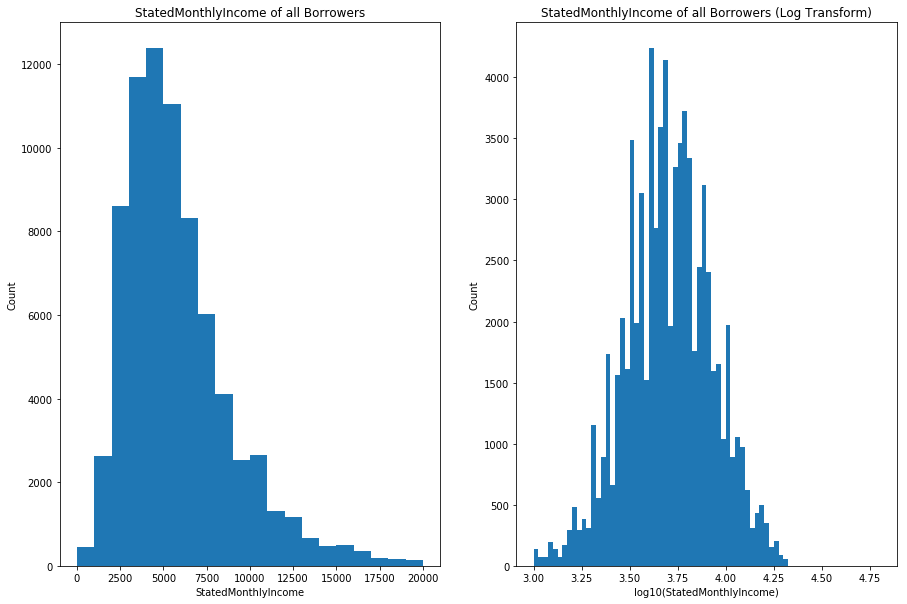

In [47]:
# As the data is too skewed we need to have  a log transform of it for making the visualisation a bell curve
# which would help us in making more specific statistic conclusions.
plt.figure(figsize = [15,10])
#getting only the data that has income less than 20k because mean was 6k
limited_df = new_df[new_df['StatedMonthlyIncome'] <= 20000]
# left plot: plot with limit of 25k as the max income
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, limited_df['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =limited_df, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

# right plot: plot after log transformation of the data
plt.subplot(1, 2, 2)
log_data = np.log10(limited_df['StatedMonthlyIncome']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log10(StatedMonthlyIncome)');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers (Log Transform)");



### Observations
We can observe from the visuals that majority of the population has been the StatedMonthlyIncome in the range 2.5k-10k $. with the maximum being at 5k$.

### Question

Visualising the LoanAmount Variable

### Visualisation

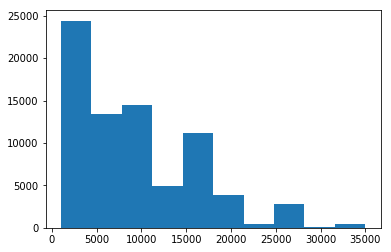

In [48]:
plt.hist(data = new_df, x = 'LoanAmount');

In [49]:
# As the plot is right skewed Lets take a look at it in more detail
new_df['LoanAmount'].describe()

count    76216.000000
mean      9294.999410
std       6413.404265
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanAmount, dtype: float64

In [50]:
np.log10(new_df['LoanAmount'].describe())

count    4.882046
mean     3.968249
std      3.807089
min      3.000000
25%      3.602060
50%      3.903090
75%      4.164450
max      4.544068
Name: LoanAmount, dtype: float64

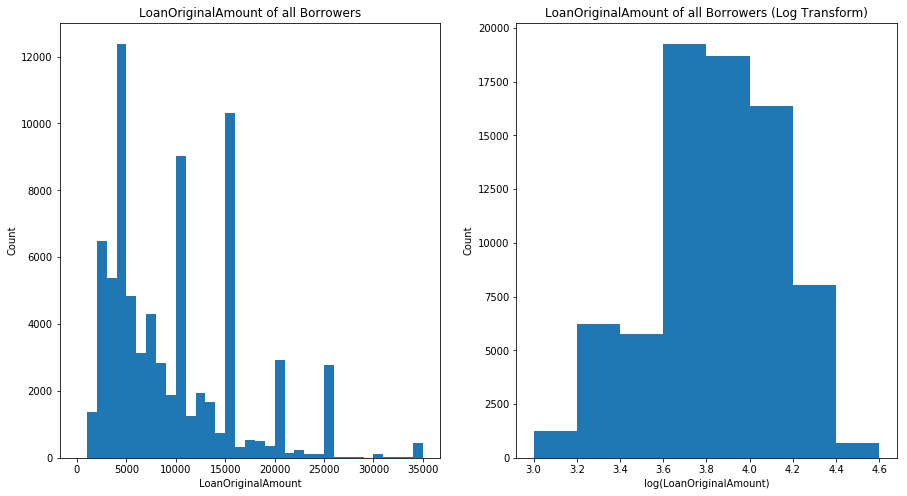

In [51]:
#Same as the StatemonthlyIncome we have to get a log transform as the dat ais skewed. 
plt.figure(figsize = [15, 8])
#adding more bins for a detailed view
# left plot: data plotted with more bins
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, new_df['LoanAmount'].max()+1000, 1000)
plt.hist(data =new_df, x = 'LoanAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right plot: data plotted after log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(new_df['LoanAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log Transform)");

#Saving the log data for later bivariate analysis
new_df['LoanAmount_log'] = np.log10(new_df['LoanAmount'])

### Observations
We can observe that the visualisation is right skewed with multiple local maximas at 4000 USD, 10000 USD and 15000 USD.

### Question

Lets have a look at the PercentFunded Variable

### Visualisation

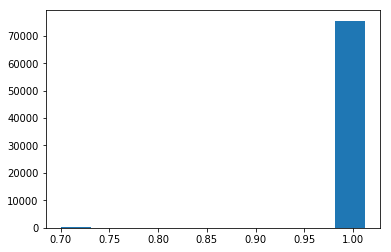

In [52]:
plt.hist(data = new_df, x = 'PercentFunded');

### Observations
We can observe that the PercentFunded variable is dominated by nearly all the population at 100% funded and a very tiny amount 70-73% funded loans. This was kind of a deadend variable as it didnt give much of the information that is required for my interest goal.

### Question

Lets have a go at the Investors variable

### Visualisation

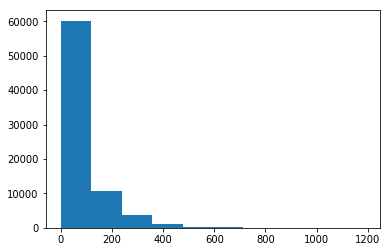

In [53]:
plt.hist(data = new_df, x = 'Investors');

In [54]:
# Again the plot is a bit right skewed lets take a look at it in more detail
new_df['Investors'].describe()

count    76216.000000
mean        69.998517
std         97.801415
min          1.000000
25%          1.000000
50%         32.000000
75%        100.000000
max       1189.000000
Name: Investors, dtype: float64

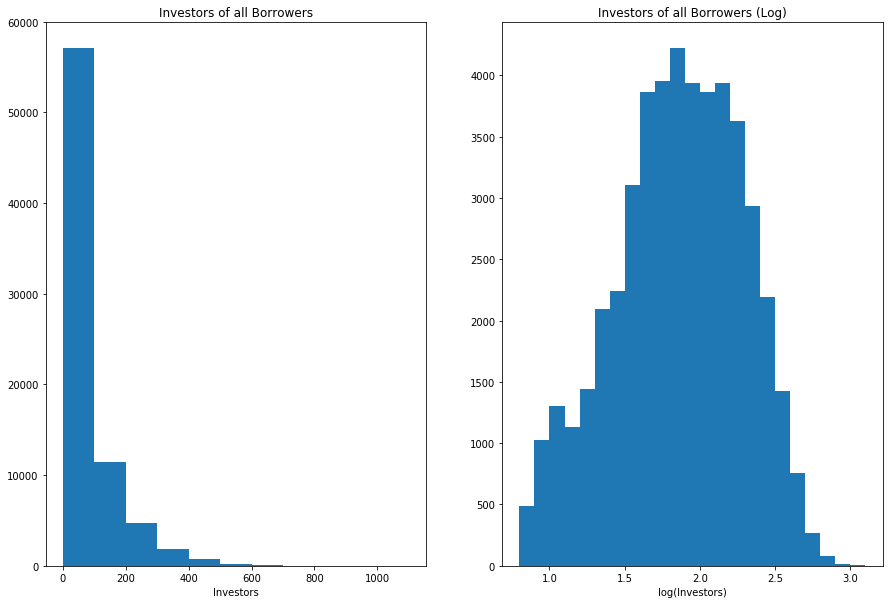

In [55]:

# Same as StateMonthlyIncome , skewed distribution.
plt.figure(figsize = [15, 10])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, new_df['Investors'].max()+10, 100)
plt.hist(data =new_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(new_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

# Saving the log transform data for later bivariate analysis
new_df['Investors_log'] = np.log10(new_df['Investors'])

### Observations
For Investors majority of the population lies withing the 0-100 mark, very low count of people get the mark above 100 Investors.

### Question

How does the CreditScoreRangeUpper Variable look like

### Visualisation

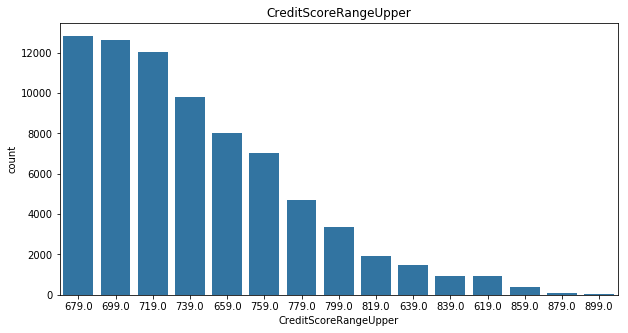

In [56]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("CreditScoreRangeUpper")
sb.countplot(data = new_df, x = 'CreditScoreRangeUpper', color = base_color,
             order = new_df['CreditScoreRangeUpper'].value_counts().index );

### Observations
The Credit Score upper Range was a variable I expected to have some kind of impact on the loan approval chance, it looks like a lot of people have average upper range for their credit score, maybe most of the loan borrowers dont have much of a credit history.

##### Some more cleaning
I had to undertake some cleaning after the single variable visualisations, I am doing this now because I couldnt introduce new variables in the middle of an analysis , also now is just the right time as it would make the bivariate and multivariate analysis cleaner. Further in the future if there needs be a change, I have done it in the tabs near the visualisation itself.

In [57]:
# Considering that the income outside 3 standard deviations will be error prone we remove the outliers from StateMonthlyIncome
income_std = new_df['StatedMonthlyIncome'].std()
income_mean = new_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
clean_df = new_df[new_df['StatedMonthlyIncome'] < boundary]

In [58]:
# Also controlling the number of Loan Listing Categories for better visualisations I have chosen 1,2,3,6,7 catgories only 
# because they comprised of the most of the population of the dataset
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
# reduced categories function does exactly what its name suggests.
def reduced_categories(row):
    loan_category = row['ListingCategory_numeric']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        # return as other type, if not present in categories list
        return categories[7]

In [59]:
clean_df['ListingCategory_numeric'] = clean_df.apply(reduced_categories, axis=1)


In [60]:
clean_df.ListingCategory_numeric.value_counts()

Debt Consolidation    48256
Other                 15485
Home Improvement       6231
Business               3619
Auto                   2029
Name: ListingCategory_numeric, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- BorrowerRate: It is the interest the borrower has to pay for his loan. It has unimodal distribution, with One unusual point I observed as a spike in the borrowers for the rate 0.32.
- StatedMonthlyIncome : The monthly income the borrower stated at the time the listing was created. It was expected that the distribution would be right skewed considering the gap between the rich and poor, I observed most of the borrowers had a salary in the range of 2500-10000, with a peak at 5000. Had to take a log transform of the data for better visualisation.
- LoanOriginalAmount: The origination amount of the loan.We can observe that the visualisation is right skewed with multiple local maximas at 4000 USD, 10000 USD and 15000 USD. These 3 maximas were unusual according to me. Had to take a log transform of the data for better visualisation.
- Investors:The number of investors that funded the loan. For Investors majority of the population lies withing the 0-100 mark, very low count of people get the mark above 100 Investors. Had to take a log transform of the data for better visualisation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- StatedMonthlyIncome,LoanOriginalAmount,Investors  :  Had to take a log transform of the data for better visualisation. As all of them were right skewed.
- StatedMonthlyIncome: I had to remove the outliers from the data as there were a very low percentage of people in the highly paid bracket, which made no sense to include in the visualisation as it wont dicatate the situation for majority of the population.
- ListingCategory_numeric: The number of categories for this variable were plenty high, while majority of the population was located in only certain catgories such as 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other', I only considered the above and removed the rest using a function named reduced_categories


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question
How are the numeric variables of interest related?

### Visualisation

In [61]:
clean_df.columns

Index(['Term', 'LoanStatus', 'Yield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_numeric', 'ProsperRating_alpha', 'ProsperScore',
       'DelinquenciesLast7Years', 'ListingCategory_numeric',
       'EmploymentStatus', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'IncomeVerifiable',
       'Recommendations', 'DebtToIncomeRatio', 'LoanAmount', 'PercentFunded',
       'IncomeRange', 'BorrowerState', 'Investors', 'CreditScoreRangeUpper',
       'MonthlyLoanPayment', 'LoanAmount_log', 'Investors_log'],
      dtype='object')

In [62]:
numeric_variables=['BorrowerRate','ProsperScore','StatedMonthlyIncome','MonthlyLoanPayment','LoanAmount'
                   ,'DelinquenciesLast7Years','Investors','LoanAmount_log','Investors_log']

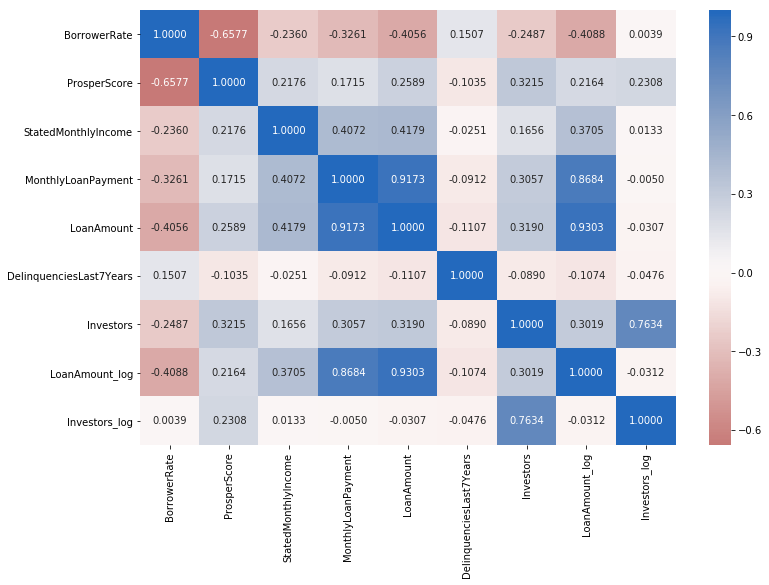

In [63]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(clean_df[numeric_variables].corr(), annot = True, fmt = '.4f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Observations

We can observe that the LoanOriginalAmount and Monthly LoanPayment are highly correlated,borrowerrate and prosper score are highly correlated(negative correlation), borrowerrate and LoanOriginalAmount are (negative correlation).



### Question

Lets have a look at the relation between the variables, LoanAmount, BorrowerRate and ProsperRating and ListingCategory

### Visualisation

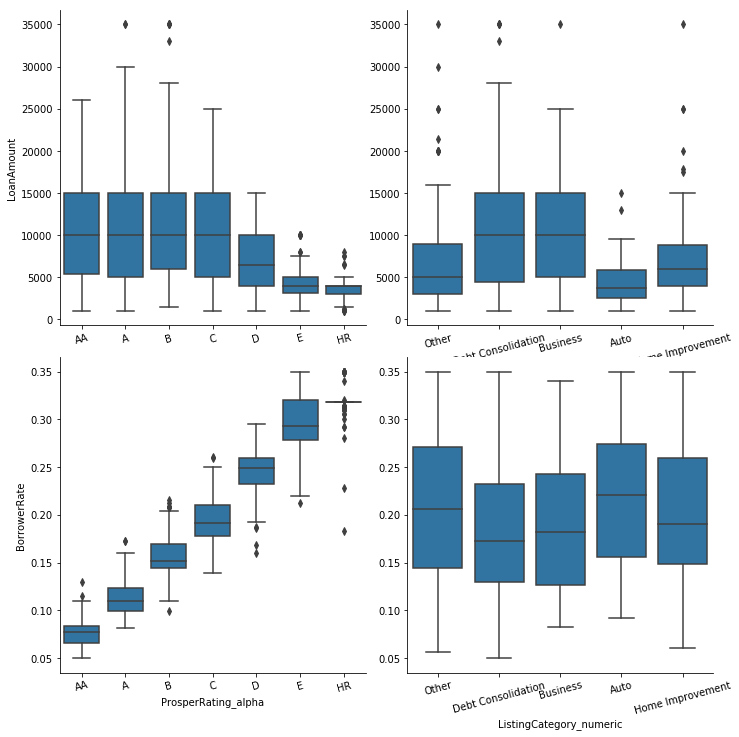

In [64]:
numeric_vars = ['LoanAmount', 'BorrowerRate']
categoric_vars = ['ProsperRating_alpha', 'ListingCategory_numeric']
samples = np.random.choice(clean_df.shape[0], 2000, replace = False)
loan_df_samp = clean_df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15);

plt.figure(figsize = [20, 10])
g = sb.PairGrid(data = loan_df_samp, y_vars = numeric_vars, x_vars = categoric_vars,size=5,aspect =1)
g.map(boxgrid);
plt.show();

### Observations
Borrowers with low Prosper rating generally receive lower loan amount and higher Borrowrate(Interest on the loan). LoanAmounts borrowed for 'other' and 'auto' categories are generally lower than rest of the categories, the rate is somewhat similar for all the categories.

### Question

Lets explore the relation between LoanAmount and IncomeRange

### Visualisation

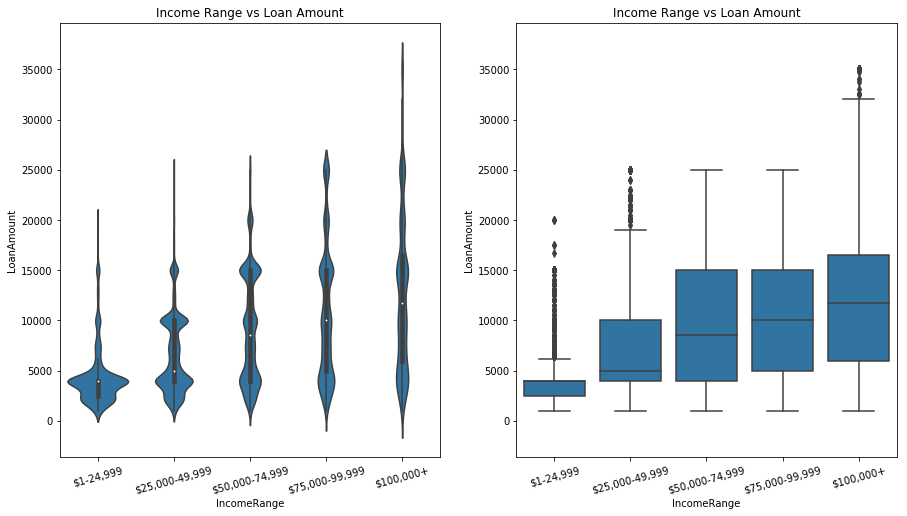

In [65]:
clean_df_part = clean_df[(clean_df['StatedMonthlyIncome'] <= 10000) ]


plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = clean_df_part, x = 'IncomeRange', y = 'LoanAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = clean_df_part, x = 'IncomeRange', y = 'LoanAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount');

### Observations
There is a gradual and steady increase in the Loan Amount allotted as the income range increases.From the violinplots we can observe that the for the lowest income range which 1-25k we have huge density of count of Borrowers for the same median Loan Amount while as we go further increasing the income range our data becomes more and more spread out and sparse around the median.

### Question

Lets have a look at the relation between categorical variables

### Visualisation

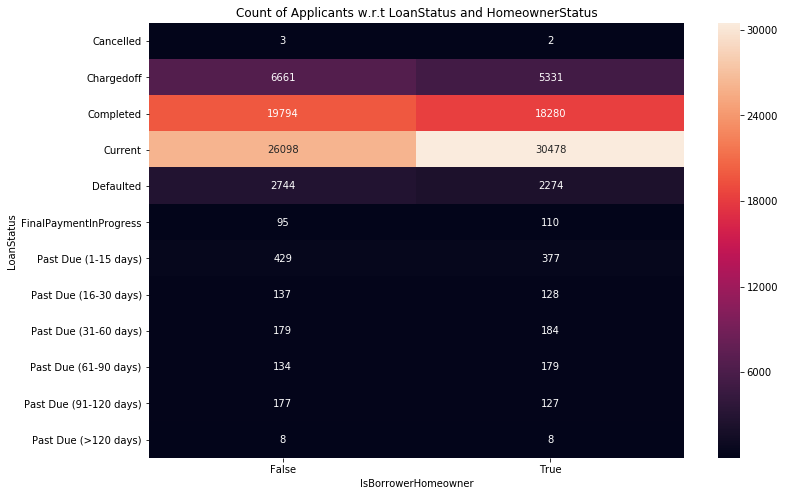

In [66]:
# Orginal heatmap of the dataset without any alterations, as there were no null values in the categorical variables, 
# but their instances still got affected later on because of null values in numeric columns
plt.figure(figsize = [12, 8])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus');

### Observations

I have used the original dataset for this relation check , because originally we had Not Employed as a parameter in the Employment status , which I had to remove for getting a better and more sensible monthly income visualisation. So using the original dataset, keeps the contrast of the relation between having the Borrower as a home owner and LoanStatus (Major difference observed in the Defaulted section for both true and false of Homeowner status). We can observe that the majority of the population lies in the loan status of Current and Completed. 

### Question

Lets Explore the relation between Delinquencies and ProsperRating

### Visualisation

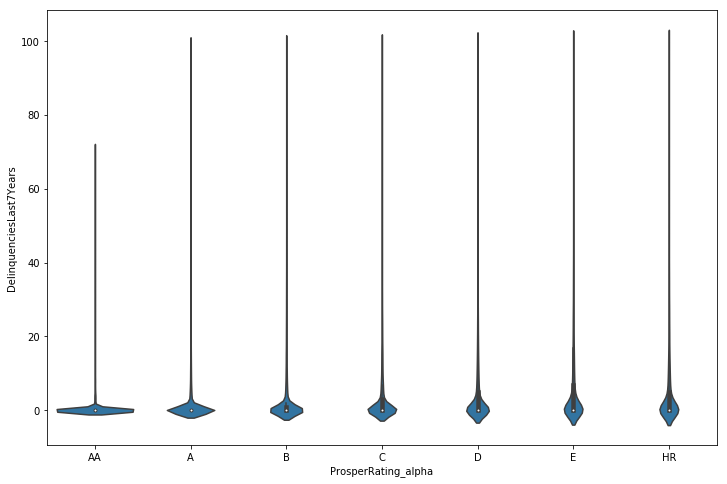

In [67]:
plt.figure(figsize = [12, 8])
sb.violinplot(data = clean_df, x = 'ProsperRating_alpha', y = 'DelinquenciesLast7Years', color = base_color);

### Observations
Delinquencies in past 7 years have a direct relation with the clear visual that AA type Prosper Rating candidate having huge density around the median, where median is 0, as we go further with the types of Prosper Ratings we have minor spreading around the median signifying the increase in the Delinquency number. 

### Question

Lets explore the relation between the variables , 'EmploymentStatus', 'ProsperRating_alpha', 'IncomeRange' one by one.

### Visualisation

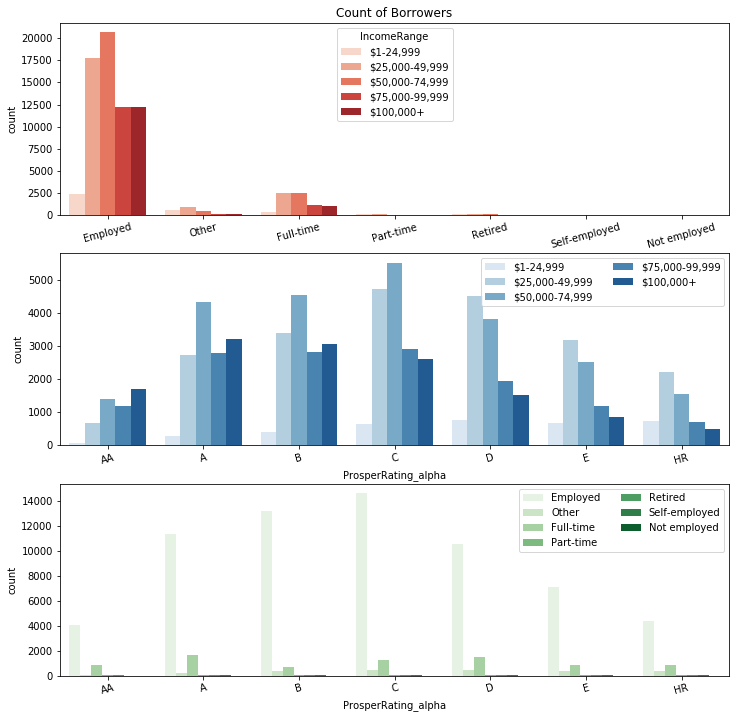

In [68]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus', 'ProsperRating_alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: EmploymentStatus vs IncomeRange
plt.subplot(3, 1, 1)
sb.countplot(data = clean_df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Reds')
plt.xticks(rotation = 15)
plt.title('Count of Borrowers')

# subplot 2: ProsperRating Alpha vs IncomeRange
ax = plt.subplot(3, 1, 2)
sb.countplot(data = clean_df, x = 'ProsperRating_alpha', hue = 'IncomeRange', palette = 'Blues')
ax.legend(ncol = 2)  #rearranging legend to avoid overlapping
plt.xticks(rotation = 15)


# subplot 3: EmploymentStatus vs ProsperRating Alpha
ax = plt.subplot(3, 1, 3)
sb.countplot(data = clean_df, x = 'ProsperRating_alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) #rearranging legend to avoid overlapping
plt.xticks(rotation = 15)


plt.show()

### Observations

First Visualisation: Most of the population comes under the Employed and Fulltime sections with majority having the income between the ranges 25-50k or 50k to 75k with maximum being in the later.
Second Visualisation: The distribution was pretty evenly spread out , only for the Type C prosperRating being the maximum by some margin, with a most common incomerange of 50k-75k.
Third Visualisation: Majority of the population is employed and with the ProsperRating of Type C closely followed by Type B and Type A. The most common Type for Fulltime employee was Type A. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most of the Features of interest were related as expected.
- There is a gradual and steady increase in the Loan Amount allotted as the income range increases.From the violinplots we can observe that the for the lowest income range which 1-25k we have huge density of count of Borrowers for the same median Loan Amount while as we go further increasing the income range our data becomes more and more spread out and sparse around the median.
- Borrowers with low Prosper rating generally receive lower loan amount and higher Borrowrate(Interest on the loan). LoanAmounts borrowed for 'other' and 'auto' categories are generally lower than rest of the categories, the rate is somewhat similar for all the categories.
- We can observe that the LoanOriginalAmount and Monthly LoanPayment are highly correlated,borrowerrate and prosper score are highly correlated(negative correlation), borrowerrate and LoanOriginalAmount are (negative correlation).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Delinquencies had a interesting relationship with the ProsperRating, As you rating decreased the Delinquencies number increased.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question

Lets have a general view of how the ProsperRatings , EmploymentStatus , LoanAmount and StateMonthlyIncome are related.

### Visualisation

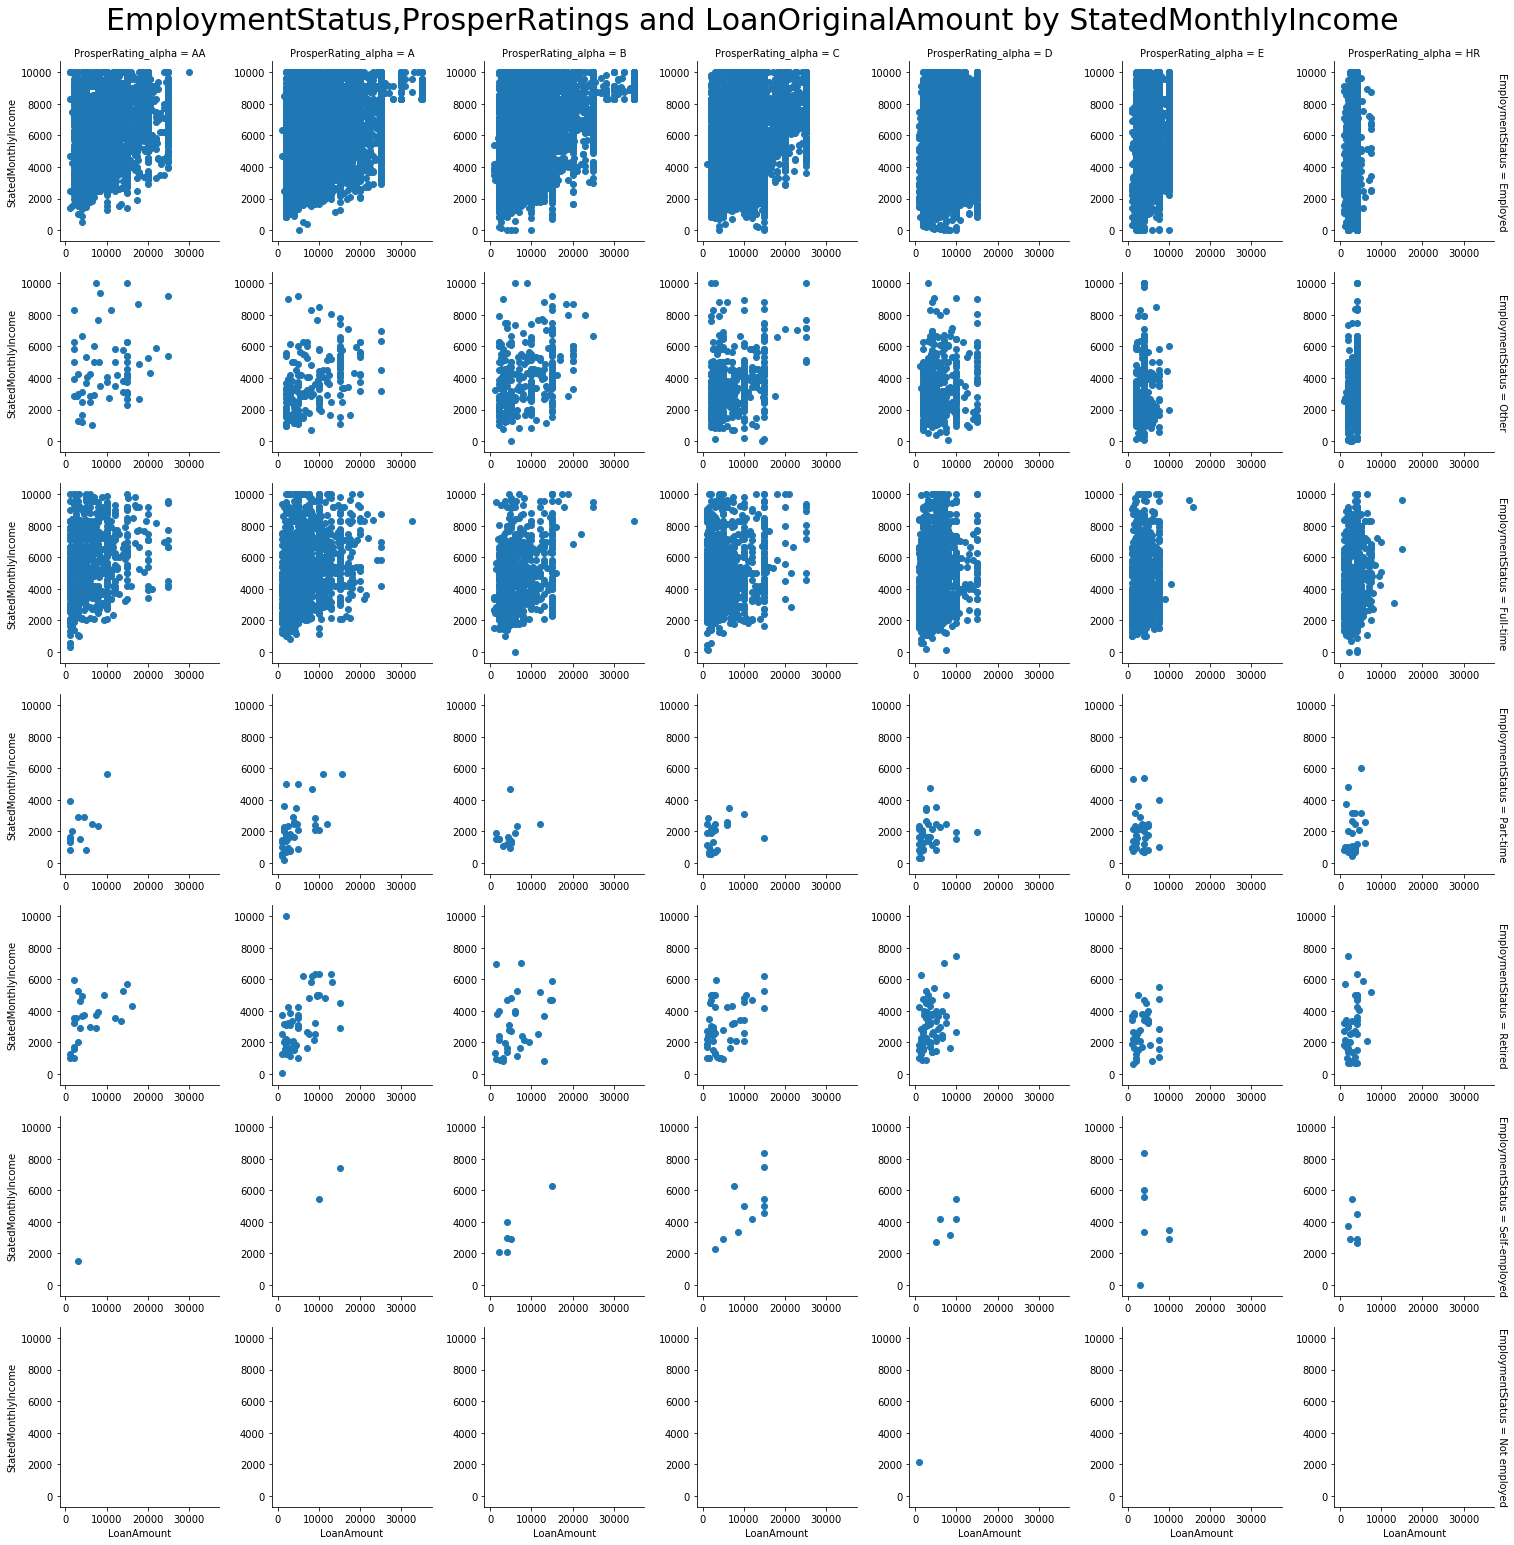

In [69]:
scattergrid = sb.FacetGrid(data = clean_df_part, col = 'ProsperRating_alpha', row = 'EmploymentStatus', size = 3,
                margin_titles = True)
scattergrid.map(plt.scatter, 'LoanAmount', 'StatedMonthlyIncome')
scattergrid.fig.subplots_adjust()
scattergrid.fig.suptitle('EmploymentStatus,ProsperRatings and LoanOriginalAmount by StatedMonthlyIncome',size=30,y=1.02);

### Observations

We can take a lot of insights from this FacetGrid Scatter plots, such as: huge majority of the population falls under the Employed and FullTime Employed status, in that part majority have a loan amount between 1-20k, some even go as high as 25k. 

### Question

Lets consider the relation between ProsperRating_alpha,BorrowerRate,IsBorrowerHomeowner

### Visualisation

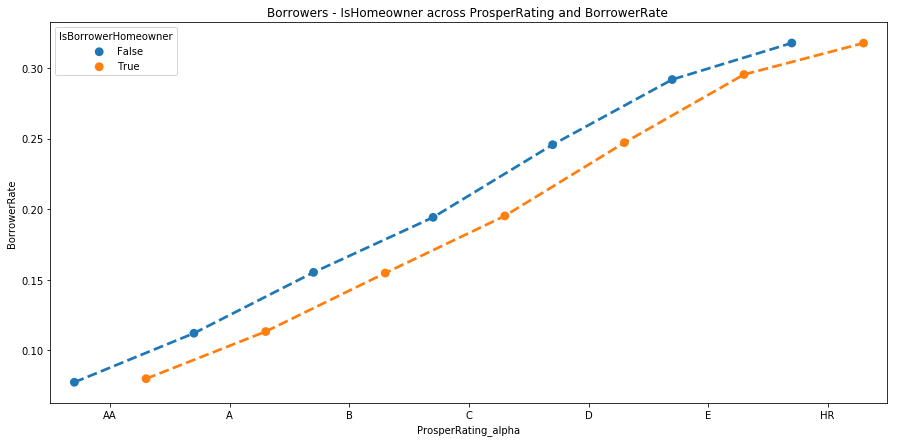

In [70]:
# To identify how the applicants interest rate is affected by ratings
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = clean_df_part, x = 'ProsperRating_alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.6, linestyles = "--");
plt.title('Borrowers - IsHomeowner across ProsperRating and BorrowerRate ');

### Observations

It can be observed that the AA Type ProperRating has the least BorrowerRate to pay for their loans, and the BorrowRate keep increasing as we go down the other types, we can also observe that generally the Homeowners have to lesser BorrowerRate as compared to the NonHomeowners

### Question

Exploring the variables Employment Status , Stated Monthly Income, ProsperRating Alpha relation

### Visualisation

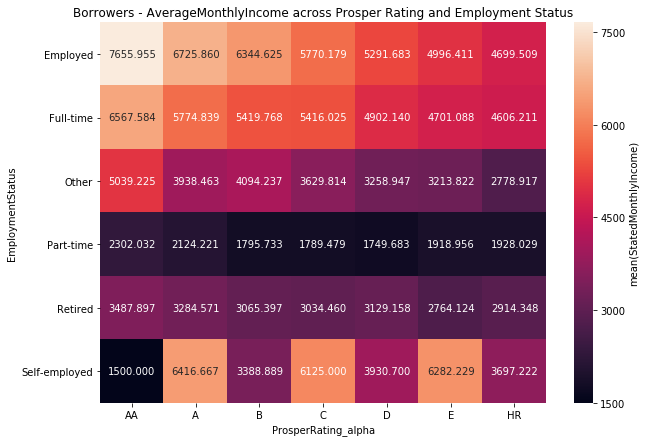

In [71]:
plt.figure(figsize = [10, 7])
# taking only employees that are employed in consideration
clean_df_employ = clean_df[clean_df['EmploymentStatus'] != 'Not employed']

mean_data = clean_df_employ.groupby(['ProsperRating_alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
mean_data = mean_data.reset_index(name = 'StatedMonthlyIncome_avg')
mean_data = mean_data.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(mean_data, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Borrowers - AverageMonthlyIncome across Prosper Rating and Employment Status');

### Observations

The Highest observed AverageMonthlyIncome was for EmployementStatus Employed, Type AA ProsperRating, while the lowest average income being for Self-Employeed EmployementStatus, Type AA ProsperRating which is 1500. 

### Question

Further exploration into LoanAmount , IncomeRange, ProsperRating Alpha relation

### Visualisation

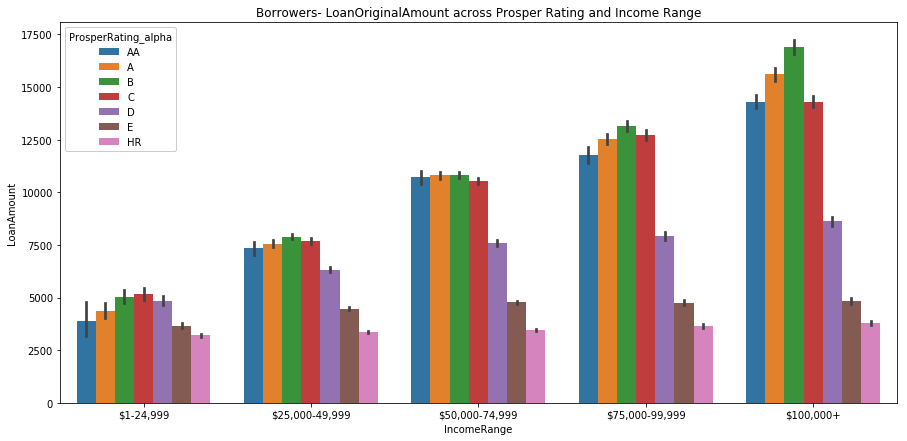

In [72]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = clean_df_employ, x = 'IncomeRange', y = 'LoanAmount', hue = 'ProsperRating_alpha')
ax.legend(loc = 'upper left', framealpha =1, title = 'ProsperRating_alpha')
plt.title('Borrowers- LoanOriginalAmount across Prosper Rating and Income Range');

### Observations
It can be clearly observed that as the incomerange increases the Original Loan Amount Increases as well, with the least being for 1-25k income range and maximum at 100k+ incomerange, on an average its A, B, C type having the maximum for most of the IncomeRange. The most varying loanamount was for Type AA ProsperRating 1-25k Income range.

### Question

Lets have a look at the relation between EmploymentStatus,StatedMonthlyIncome,ProsperRating_alpha


### Visualisation

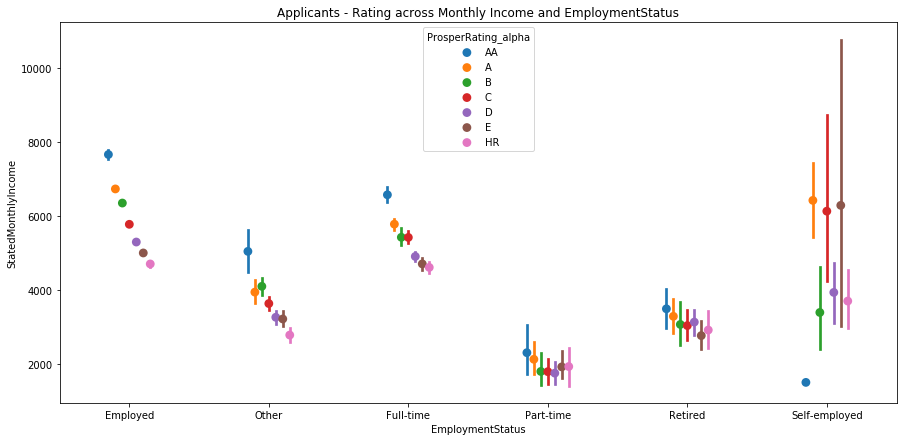

In [73]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = clean_df_employ, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

In [74]:
clean_df.query("ProsperRating_alpha=='AA' and EmploymentStatus=='Self-employed'" ).StatedMonthlyIncome

57116    1500.0
Name: StatedMonthlyIncome, dtype: float64

### Observations

It can be observed that the Employed and FullTime employed members of the population has the highest and the most stable StatedMonthly Income Values, with AA Type ProsperRating having the highest and rest all going down as we move in order of types. The most volatile sector for StatedMonthlyIncome was SelfEmployed, they have the lowest StatedIncome of all the AA Type borrowers, where the values for the other types are varying a lot as well.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- It can be observed that the AA Type ProperRating has the least BorrowerRate to pay for their loans, and the BorrowRate keep increasing as we go down the other types, we can also observe that generally the Homeowners have to lesser BorrowerRate as compared to the NonHomeowners.
- The Highest observed AverageMonthlyIncome was for EmployementStatus Employed, Type AA ProsperRating, while the lowest average income being for Self-Employeed EmployementStatus, Type AA ProsperRating which is 1500. 

### Were there any interesting or surprising interactions between features?

- Yes, It was surprising to see that AA Type Prosperrating self employed individuals had the least statedMonthlyIncome of all, I think this might be because there are not so many individuals that would be fitting the conditions above, or even none as well is a possibility. After further digging, it is apparent that there was only one individual out of the 113k instances that comes under the specific condition I mentioned.

## Conclusions
- Prosper Rating from AA to D have the higher loan amount allotted to them also that have more StatedMonthlyIncome as compared to the rest.
- Majority of the Borrowers are from the ProsperRating type B. Making it a point that there could be more chance of a loan being approved for type B ProsperRating Borrowers.
- NonHomeowner have to pay more Interest (BorrowerRate) as compared to the homeowners. We can conclude that Homeowners have a higher chance of loan approval. One other observation is that ProsperRating Type HR have to pay the highest interest rates irrespective of their Homeowning status.
- EmploymentStatus also plays a huge role in the decision of the Loan Amount, As it was observed that the maximum loan amount allotted was to the type B ProsperRating individuals that were Employed, and had StatedMonthlyIncome between 8000-10000.
- Delinquencies in past 7 years have a direct relation with the clear visual that AA type Prosper Rating candidate having huge density around the median, where median is 0, as we go further with the types of Prosper Ratings we have minor spreading around the median signifying the increase in the Delinquency number.


I can conclude by saying that EmploymentStatus, ProsperRating, IncomeRange, StatedMonthlyIncome, DelinquenciesLast7Years, HomeownerStatus have direct impact on the loan approval chances of any given individual.



> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [75]:
clean_df.to_csv('clean_data.csv',index=False)